In [225]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from funciones.faltantes import *
plt.rc('font', family='Bahnschrift') 

Primero se leen los diferentes conjuntos de datos.

In [226]:
ruta_base = r'C:\Users\CCOSTA397\OneDrive\Desktop\CIDEACC\convocatoria38\raw_data\data_dane'
df_cargados = []
departamentos = [d for d in os.listdir(ruta_base) if os.path.isdir(os.path.join(ruta_base, d))]

for depto in departamentos:
    ruta_depto = os.path.join(ruta_base, depto)
    for archivo in os.listdir(ruta_depto):
        if archivo.endswith(".CSV"):
            try:
                tipo = archivo.split("_")[0] 
                nombre_variable = f"df_{depto}_{tipo}"
                ruta_archivo = os.path.join(ruta_depto, archivo)
                df = pd.read_csv(ruta_archivo)
                globals()[nombre_variable] = df
                df_cargados.append(nombre_variable)
            except Exception as e:
                print(f"Error en {archivo}: {e}")
print(f'Se han cargado {len(df_cargados)} archivos, correspondientes a {len(df_cargados)//4} departamentos')

Se han cargado 32 archivos, correspondientes a 8 departamentos


In [227]:
dflist_personas = {
    'ATLANTICO': df_atlantico_personas,
    'CESAR': df_cesar_personas,
    'SAN ANDRES Y PROVIDENCIA': df_sanandres_personas,
    'CORDOBA': df_cordoba_personas,
    'SUCRE': df_sucre_personas,
    'BOLIVAR': df_bolivar_personas,
    'MAGDALENA': df_magdalena_personas,
    'LA GUAJIRA': df_guajira_personas,
}

df_atlantico_viviendas = df_atlantico_viviendas.drop_duplicates(subset=['COD_ENCUESTAS'], keep='first')
df_atlantico_geo = df_atlantico_geo.drop_duplicates(subset=['COD_ENCUESTAS'], keep='first')

dflist_viviendas = {
    'ATLANTICO': df_atlantico_viviendas,
    'CESAR': df_cesar_viviendas,
    'SAN ANDRES Y PROVIDENCIA': df_sanandres_viviendas,
    'CORDOBA': df_cordoba_viviendas,
    'SUCRE': df_sucre_viviendas,
    'BOLIVAR': df_bolivar_viviendas,
    'MAGDALENA': df_magdalena_viviendas,
    'LA GUAJIRA': df_guajira_viviendas,
}
df_atlantico_hogares = df_atlantico_hogares[df_atlantico_hogares['H_NROHOG'] == 1]
df_cesar_hogares = df_cesar_hogares[df_cesar_hogares['H_NROHOG'] == 1]
df_sanandres_hogares = df_sanandres_hogares[df_sanandres_hogares['H_NROHOG'] == 1]
df_cordoba_hogares = df_cordoba_hogares[df_cordoba_hogares['H_NROHOG'] == 1]
df_sucre_hogares = df_sucre_hogares[df_sucre_hogares['H_NROHOG'] == 1]
df_bolivar_hogares = df_bolivar_hogares[df_bolivar_hogares['H_NROHOG'] == 1]
df_magdalena_hogares = df_magdalena_hogares[df_magdalena_hogares['H_NROHOG'] == 1]
df_guajira_hogares = df_guajira_hogares[df_guajira_hogares['H_NROHOG'] == 1]

dflist_hogares = {
    'ATLANTICO': df_atlantico_hogares,
    'CESAR': df_cesar_hogares,
    'SAN ANDRES Y PROVIDENCIA': df_sanandres_hogares,
    'CORDOBA': df_cordoba_hogares,
    'SUCRE': df_sucre_hogares,
    'BOLIVAR': df_bolivar_hogares,
    'MAGDALENA': df_magdalena_hogares,
    'LA GUAJIRA': df_guajira_hogares,
}

dflist_geo = {
    'ATLANTICO': df_atlantico_geo,
    'CESAR': df_cesar_geo,
    'SAN ANDRES Y PROVIDENCIA': df_sanandres_geo,
    'CORDOBA': df_cordoba_geo,
    'SUCRE': df_sucre_geo,
    'BOLIVAR': df_bolivar_geo,
    'MAGDALENA': df_magdalena_geo,
    'LA GUAJIRA': df_guajira_geo,
}

## **Distribución de la cantidad de hogares por vivienda**

In [ ]:
stats = []
for departamento, df in dflist_hogares.items():
    df_counts = (df.groupby('COD_ENCUESTAS').size().reset_index(name='total'))
    desc = df_counts['total'].describe()
    stats.append({
        'departamento': departamento,
        'count': desc['count'],
        'mean' : desc['mean'],
        'std'  : desc['std'],
        'min'  : desc['min'],
        '25%'  : desc['25%'],
        '50%'  : desc['50%'],
        '75%'  : desc['75%'],
        'max'  : desc['max']
    })

stats_df = pd.DataFrame(stats).set_index('departamento')
stats_df

,count,mean,std,min,25%,50%,75%,max
departamento,,,,,,,,
ATLANTICO,598418.0,1.045062,0.263517,1.0,1.0,1.0,1.0,23.0
CESAR,296634.0,1.068037,0.309186,1.0,1.0,1.0,1.0,9.0
SAN ANDRES Y PROVIDENCIA,16210.0,1.009685,0.121042,1.0,1.0,1.0,1.0,6.0
CORDOBA,411996.0,1.132856,0.427027,1.0,1.0,1.0,1.0,10.0
SUCRE,229368.0,1.046794,0.253492,1.0,1.0,1.0,1.0,7.0
BOLIVAR,509390.0,1.065814,0.312850,1.0,1.0,1.0,1.0,11.0
MAGDALENA,319419.0,1.076652,0.328986,1.0,1.0,1.0,1.0,9.0
LA GUAJIRA,214928.0,1.058159,0.318824,1.0,1.0,1.0,1.0,11.0


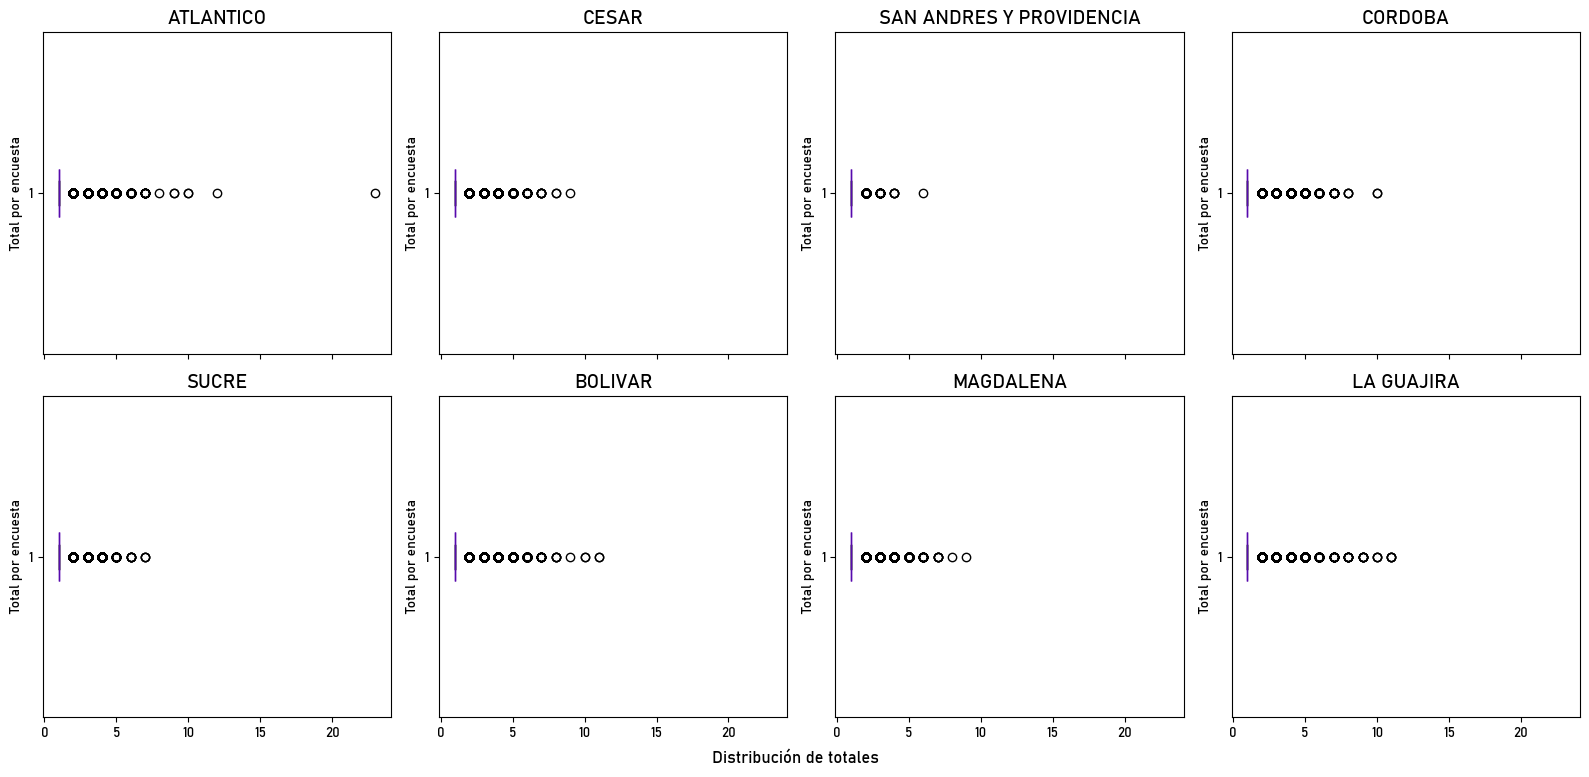

In [ ]:
def plot_boxplot_grid(data_dict, rows=2, cols=4,figsize=(16, 8),xlabel='Distribución de totales', ylabel='Total por encuesta'):
    n = len(data_dict)
    fig, axes = plt.subplots(rows, cols, figsize=figsize, sharex=True)
    axes_flat = axes.flatten()

    # Recorremos cada departamento y su DataFrame
    for ax, (dept_name, df) in zip(axes_flat, data_dict.items()):
        # Calculamos totales por encuesta
        df_counts = (
            df.groupby('COD_ENCUESTAS')
              .size()
              .reset_index(name='total')
        )
        # Dibujamos el boxplot horizontal
        bp = ax.boxplot(
            df_counts['total'],
            vert=False,
            patch_artist=True,
            boxprops=dict(facecolor='#7209B7', edgecolor='#640AB2'),
            medianprops=dict(color='#560BAD')
        )
        ax.set_title(dept_name, fontsize=14)
        ax.set_ylabel(ylabel, fontsize=10)
        ax.set_xlabel('')

    # Desactivamos ejes sobrantes si hay menos departamentos que celdas
    for ax in axes_flat[n:]:
        ax.axis('off')

    # Etiqueta común del eje X
    fig.text(0.5, 0.04, xlabel, ha='center', fontsize=12)
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

plot_boxplot_grid(dflist_hogares, rows=2, cols=4, figsize=(16, 8))


**Decisión**: Escoger solo 1 hogar por cada vivienda. En este caso, el primer hogar por cada vivienda, dado que no todas las viviendas tienen más de un hogar

## **Distribución de la cantidad de personas por hogares**

In [ ]:
summary_list = []
for dept, df in dflist_personas.items():
    df_personas = (df.groupby(['COD_ENCUESTAS', 'P_NROHOG']).size().reset_index(name='n_personas'))

    desc = df_personas['n_personas'].describe()
    summary_list.append({
        'Departamento': dept,
        'count': int(desc['count']),
        'mean': desc['mean'],
        'std': desc['std'],
        'min': desc['min'],
        '25%': desc['25%'],
        '50%': desc['50%'],
        '75%': desc['75%'],
        'max': desc['max']
    })

summary_df = pd.DataFrame(summary_list)
summary_df

,Departamento,count,mean,std,min,25%,50%,75%,max
0,ATLANTICO,625123,3.737559,1.893930,1.0,2.0,4.0,5.0,31.0
1,CESAR,316717,3.452871,1.795731,1.0,2.0,3.0,4.0,24.0
2,SAN ANDRES Y PROVIDENCIA,16354,2.924911,1.595179,1.0,2.0,3.0,4.0,13.0
3,CORDOBA,466615,3.326239,1.692524,1.0,2.0,3.0,4.0,25.0
4,SUCRE,240068,3.582839,1.859756,1.0,2.0,3.0,5.0,25.0
5,BOLIVAR,542694,3.507420,1.783587,1.0,2.0,3.0,5.0,27.0
6,MAGDALENA,343790,3.666605,1.903838,1.0,2.0,3.0,5.0,25.0
7,LA GUAJIRA,227367,3.599379,2.011267,1.0,2.0,3.0,5.0,39.0


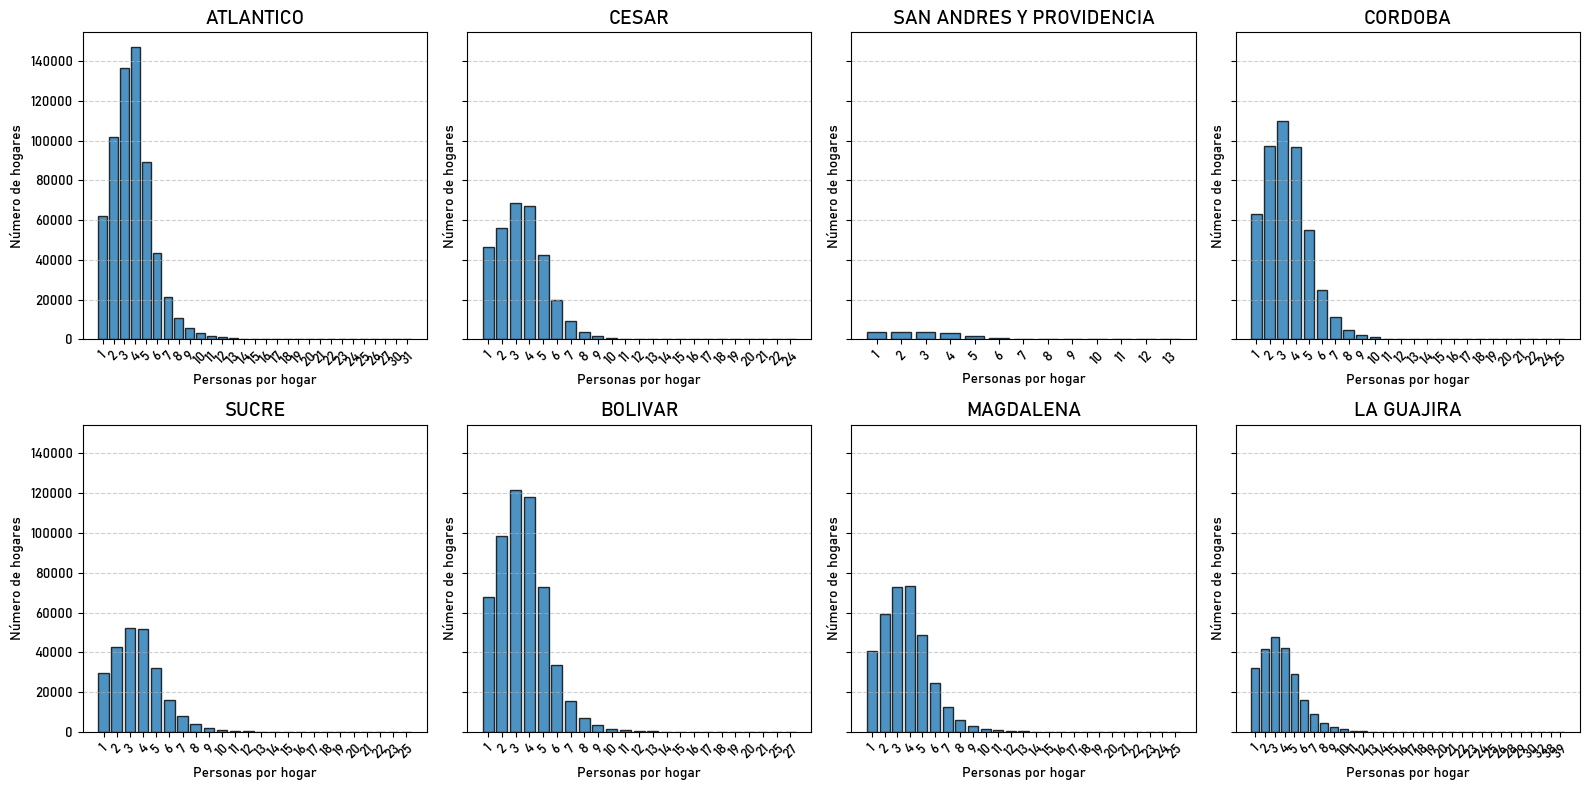

In [ ]:
rows, cols = 2, 4
fig, axes = plt.subplots(rows, cols, figsize=(16, 8), sharey=True)
axes_flat = axes.flatten()

for ax, (departamento, df) in zip(axes_flat, dflist_personas.items()):
    df_personas = (df.groupby(['COD_ENCUESTAS', 'P_NROHOG']).size().reset_index(name='n_personas'))
    
    dist = (df_personas['n_personas'].value_counts().sort_index().reset_index(name='n_hogares').rename(columns={'index': 'n_personas'}))

    ax.bar(dist['n_personas'].astype(str),dist['n_hogares'],edgecolor='black',alpha=0.8)
    ax.set_title(departamento, fontsize = 14)
    ax.set_xlabel('Personas por hogar', fontsize = 10)
    ax.set_ylabel('Número de hogares', fontsize = 10)
    ax.grid(axis='y', linestyle='--', alpha = 0.6)
    ax.tick_params(axis = 'x', rotation = 45)

for ax in axes_flat[len(dflist_personas):]:
    ax.axis('off')
plt.tight_layout()
plt.show()


# **Mini-EDA**

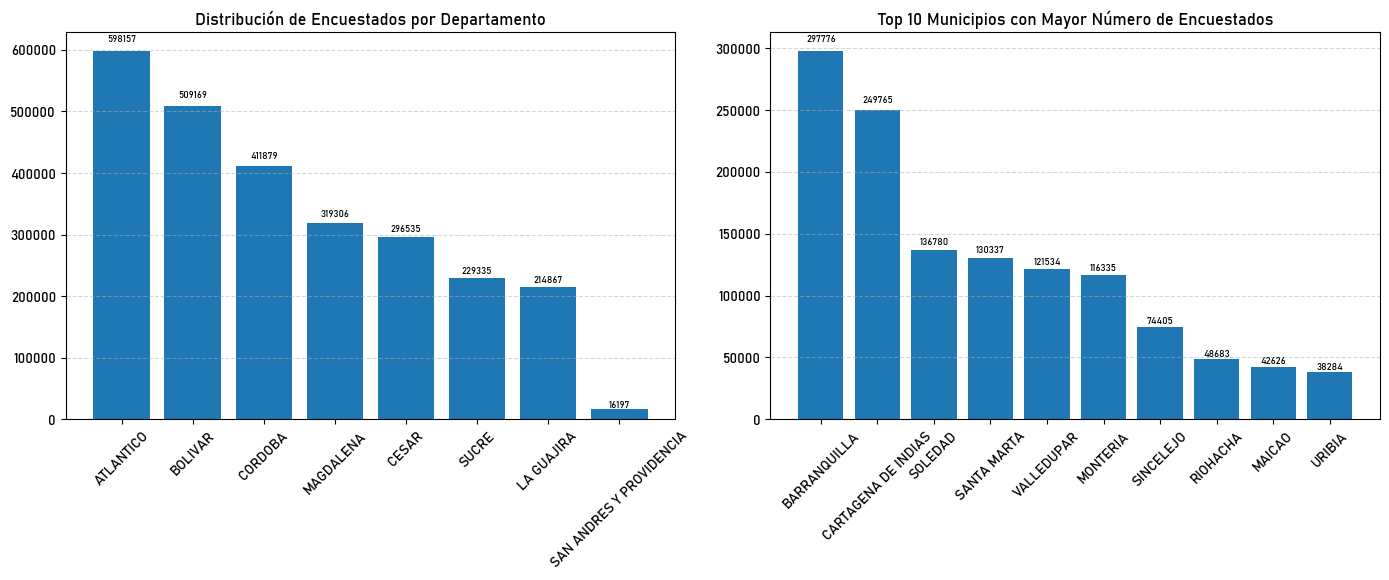

In [ ]:
import matplotlib.pyplot as plt

df = data_processed_censo.copy()

dept_counts = df['DEPARTAMENTO'].value_counts()
mun_counts = df['MUNICIPIO'].value_counts().head(10)

def annotate_bars(ax, bars, labels=None):
    for i, bar in enumerate(bars):
        h = bar.get_height()
        text = f"{h}"
        if labels is not None:
            text += f"\n{labels[i]}"
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            h * 1.02,             
            text,
            ha='center',
            va='bottom',
            fontsize=7          
        )

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bars = axes[0].bar(dept_counts.index, dept_counts.values)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
annotate_bars(axes[0], bars)

bars = axes[1].bar(mun_counts.index, mun_counts.values)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
annotate_bars(axes[1], bars)

axes[0].set_title('Distribución de Encuestados por Departamento')
axes[1].set_title('Top 10 Municipios con Mayor Número de Encuestados')


plt.tight_layout()
plt.subplots_adjust(bottom=0.15) 
plt.show()
